In [19]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import datetime
import math
import pywt
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [6]:
#Load historical ptions data
data = pd.read_csv("/Users/luka/Projects/CitadelProject/Data/S&P500.csv")


In [7]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    dataset['ma100'] = dataset['Close'].rolling(window=100).mean()
    dataset['ma150'] = dataset['Close'].rolling(window=150).mean()
    dataset['ma200'] = dataset['Close'].rolling(window=200).mean()
    
    # Create Exponential moving average
    dataset["ema30"] = dataset.ta.ema(30)
    dataset['ema200'] = dataset.ta.ema(200)

    #Logarithmic Return
    dataset["Log_Data"] = (np.log(dataset["Close"]))

    #
    dataset["ebsw"] = dataset.ta.ebsw()
    
    #Other Pandas-TA Indicators
    dataset["RSI"] = dataset.ta.rsi()
    dataset["RSX"] = dataset.ta.rsx()
    dataset["uo"] = dataset.ta.uo()
    
    #Pandas-TA Statistics
    dataset["entropy"] = dataset.ta.entropy()
    dataset["kurtosis"] = dataset.ta.kurtosis()
    dataset["mad"] = dataset.ta.mad()
    dataset["median"] = dataset.ta.median()
    dataset["quantile"] = dataset.ta.quantile()
    dataset["skew"] = dataset.ta.skew()
    dataset["stdev"] = dataset.ta.stdev()
    dataset["variance"] = dataset.ta.variance()
    dataset["zscore"] = dataset.ta.zscore()

    #Pandas-TA Trend
    dataset["chop"] = dataset.ta.chop()
    dataset["decay"] = dataset.ta.decay()
    dataset["decreasing"] = dataset.ta.decreasing()
    dataset["dpo"] = dataset.ta.dpo()
    dataset["increasing"] = dataset.ta.increasing()
    dataset["qstick"] = dataset.ta.qstick()

    #Pandas-TA Volatility
    dataset["massi"] = dataset.ta.massi()

    #Pandas-TA Volume
    dataset["ad"] = dataset.ta.ad()

    #Gausian Filter
    dataset["GF"] = gaussian_filter((dataset["Close"]), sigma=1)

    
    return dataset

In [8]:
dataset_TI = get_technical_indicators(data)
dataset_TI = dataset_TI.dropna()

In [9]:
dataset_TI

,Date,Open,High,Low,Close,Adj Close,Volume,ma7,ma21,ma100,...,zscore,chop,decay,decreasing,dpo,increasing,qstick,massi,ad,GF
199,1928-10-16,21.719999,21.719999,21.719999,21.719999,21.719999,0,21.400000,21.316667,19.925300,...,2.529170,34.345910,21.719999,0,0.090499,1,2.220446e-16,25.000000,0.000000e+00,21.714770
200,1928-10-17,21.790001,21.790001,21.790001,21.790001,21.790001,0,21.481429,21.338571,19.944500,...,2.514166,31.705968,21.790001,0,0.120501,1,2.220446e-16,25.000000,0.000000e+00,21.785599
201,1928-10-18,21.840000,21.840000,21.840000,21.840000,21.840000,0,21.585714,21.370000,19.963900,...,2.386458,23.296813,21.840000,0,0.136000,1,2.220446e-16,25.000000,0.000000e+00,21.848461
202,1928-10-19,21.959999,21.959999,21.959999,21.959999,21.959999,0,21.697143,21.407143,19.987800,...,2.532558,20.498097,21.959999,0,0.204999,1,2.220446e-16,25.000000,0.000000e+00,21.883970
203,1928-10-22,21.809999,21.809999,21.809999,21.809999,21.809999,0,21.754286,21.435238,20.007700,...,1.761239,18.636301,21.809999,1,-0.001501,0,2.220446e-16,25.000000,0.000000e+00,21.891831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23830,2022-11-10,3859.889893,3958.330078,3859.889893,3956.370117,3956.370117,5781260000,3798.568604,3775.146217,3902.288516,...,2.112000,56.564626,3956.370117,0,51.295093,1,5.530518e-01,24.904972,2.086972e+12,3907.526765
23831,2022-11-11,3963.719971,4001.479980,3944.820068,3992.929932,3992.929932,5593310000,3831.888602,3790.528123,3904.618916,...,2.220848,50.341090,3992.929932,0,83.572412,1,-5.805957e+00,24.874980,2.090878e+12,3961.279047
23832,2022-11-14,3977.969971,4008.969971,3956.399902,3957.250000,3957.250000,4561930000,3865.797189,3808.346215,3906.234116,...,1.717984,48.986211,3992.729932,1,36.691980,0,-6.890942e+00,24.834012,2.086463e+12,3973.273921
23833,2022-11-15,4006.409912,4028.840088,3953.169922,3991.729980,3991.729980,5015310000,3897.394322,3823.288121,3907.034016,...,1.845317,47.090209,3991.729980,0,55.327954,1,-3.789941e+00,24.820720,2.086559e+12,3972.730495


Plotting

In [33]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ema30'],label='EMA30', color='g',linestyle='--')
    plt.plot(dataset['ema200'],label='EMA200', color='y',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    #plt.plot(dataset['GF'],label='Gausian Filter', color='r',linestyle='--')
    #plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    #plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    #plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical Indicators - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    #plt.title('Volatility')
    plt.plot(dataset['stdev'],label='Volatility', linestyle='-.')
    #plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    #plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    #plt.plot(dataset['Log_Data'],label='Log', color='b',linestyle='-')

    plt.legend()
    plt.show()

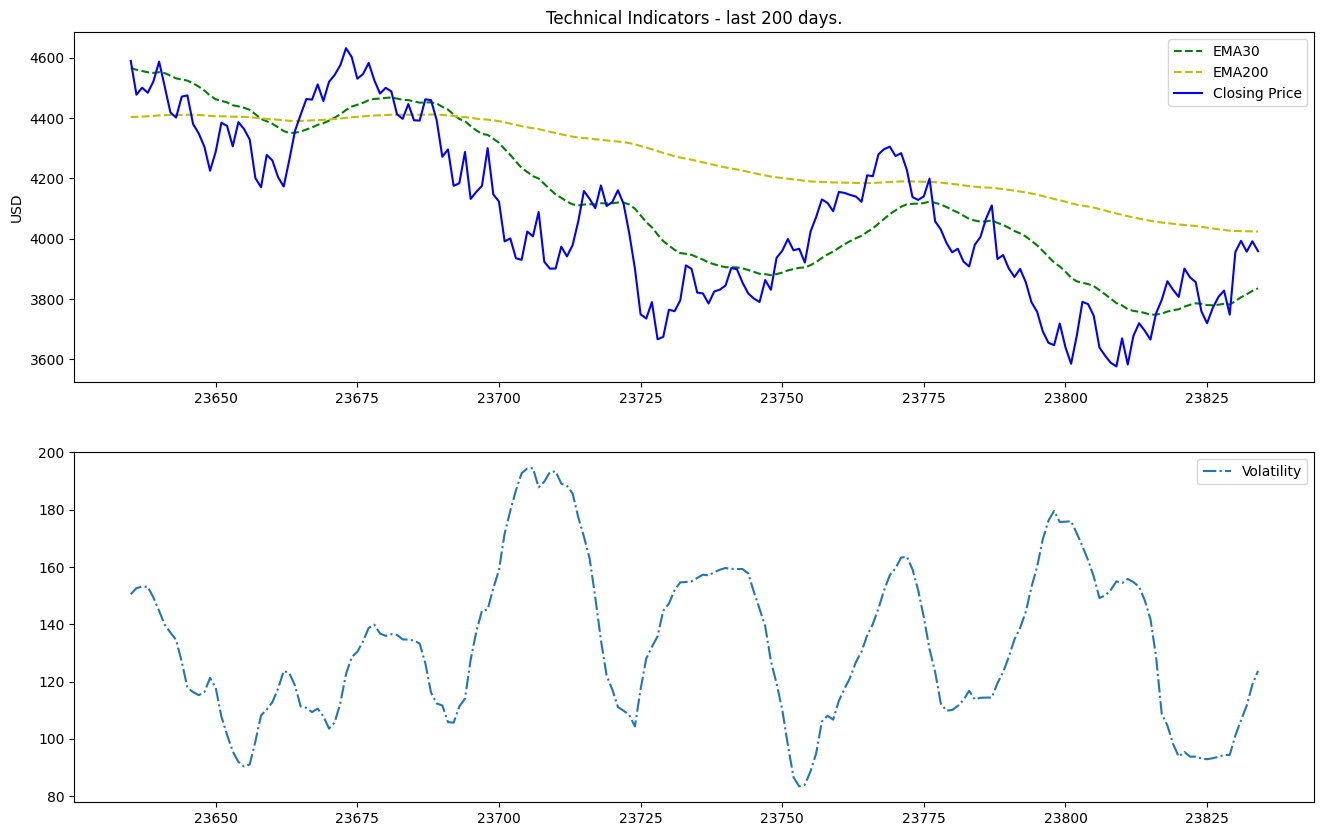

In [34]:
plot_technical_indicators(dataset_TI, 200)

Data

In [10]:
X = (dataset_TI.drop(columns=["Date", 'Close', 'Adj Close'])).values
y = (dataset_TI[["Close"]]).values

X.shape, y.shape

((23636, 34), (23636, 1))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler_x=MinMaxScaler()
scaler_y=MinMaxScaler()
X_scaled=scaler_x.fit_transform(np.array(X))
Y_scaled=scaler_y.fit_transform(np.array(y))

In [12]:
#Splitting the data into train and test data
split = int(len(X_scaled) * 0.9)
print(split)

X_tr, X_tst = X_scaled[:split], X_scaled[split:]
X_tr.shape, X_tst.shape

y_tr, y_tst = Y_scaled[:split], Y_scaled[split:]
y_tr.shape, y_tst.shape

21272


((21272, 1), (2364, 1))

In [13]:
# convert an array of values into a dataset matrix
def create_dataset(data_x, data_y, time_step=1):
	data_X, data_Y = [], []
	for i in range(len(data_x)-time_step+1):
		a = data_x[i:(i+time_step), : ]   ###i=0, 0,1,2,3-----99   100 
		data_X.append(a)
		data_Y.append(data_y[i + time_step -1])
	return np.array(data_X), np.array(data_Y)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10 #We will use previous 10 days data to predict future date index value
X_train, y_train = create_dataset(X_tr,y_tr, time_step)
X_test, y_test = create_dataset(X_tst,y_tst, time_step)

In [15]:
X_train.shape, y_train.shape

((21263, 10, 34), (21263, 1))

In [16]:
print('Number of input rows = ',X_train.shape[0])
print('Number of sequence input which will be fed into lstm model to train it = ',X_train.shape[1])
print('Number of columns = ',X_train.shape[2])

Number of input rows =  21263
Number of sequence input which will be fed into lstm model to train it =  10
Number of columns =  34


In [17]:
X_test.shape, y_test.shape

((2355, 10, 34), (2355, 1))

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , X_test.shape[2])

Model

In [ ]:
## importing necessery library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Import necessary libraries
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

# Preprocess the stock price data
# (omitted for brevity)

# Define the architecture of the autoencoder
input_layer = Input(shape=(n_inputs,))
encoded = Dense(n_hidden1, activation='relu')(input_layer)
encoded = Dense(n_hidden2, activation='relu')(encoded)
decoded = Dense(n_hidden1, activation='relu')(encoded)
decoded = Dense(n_inputs, activation='sigmoid')(decoded)

# Compile the autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=n_epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test))

# Extract the lower-dimensional representation of the data
encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X)

In [ ]:
#creating stacked model
model=Sequential()
model.add(GRU(16,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(PReLU())
model.add(Dropout(0.3))

model.add(GRU(4,return_sequences=True))
model.add(PReLU())
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(PReLU())
model.compile(loss="huber", metrics=["mse", 'mape'],optimizer='adam')

In [ ]:
early_stopping = EarlyStopping(patience=5, baseline=None)

In [ ]:
#training the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25,batch_size=64,verbose=1)

Testing

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict.shape, test_predict.shape

In [ ]:
X_train.shape

In [ ]:
x_train = []
for timestep in X_train :
  x_train.append(timestep[time_step-1])

In [ ]:
x_test = []
for timestep in X_test :
  x_test.append(timestep[time_step-1])

In [ ]:
x_train = scaler_x.inverse_transform(x_train)
y_train = scaler_y.inverse_transform(y_train)

In [ ]:
train_predict=scaler_y.inverse_transform(train_predict)

x_test = scaler_x.inverse_transform(x_test)
y_test = y_test.reshape(-1,1)
y_test = scaler_y.inverse_transform(y_test)
test_predict=scaler_y.inverse_transform(test_predict)


In [ ]:
#concatinating dependent and independent features in training data
X_train = np.concatenate((x_train,y_train,train_predict), axis = 1)
#concatinating dependent and independent features in test data
X_test = np.concatenate((x_test,y_test,test_predict), axis = 1)
#Creating pandas dataframe for training data
X_train = pd.DataFrame(X_train, columns = ['Open','High','Low','Close','Volume','returns','pred_return'])
#Creating pandas dataframe for test data
X_test = pd.DataFrame(X_test, columns = ['Open','High','Low','Close','Volume','returns','pred_return'])
X_train.head()


In [ ]:
X_train['pred_output'] = X_train['Open'] * (1+X_train['pred_return'])
#this future stock price column will be used to test our prediction
X_train['future_output'] = X_train['Open'].shift(-1)
X_train

In [ ]:
X_test['pred_output'] = X_test['Open'] * (1+X_test['pred_return'])
X_test['future_output'] = X_test['Open'].shift(-1)
X_test

In [ ]:
#let' analyse the loss
# function to calculate absolute percentage error
def cal_ape(y_true, y_pred):
    ape = abs((y_true-y_pred)/y_true) *100
    return ape
X_train['abs_perc_error'] = cal_ape(X_train['pred_output'], X_train['future_output'])
X_test['abs_perc_error'] = cal_ape(X_test['pred_output'], X_test['future_output'])
X_test

In [ ]:
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(X_train['future_output'],label='Next day Opening price of S&P 500 ind value ')
plt.plot(X_train['pred_output'],label = 'Output predicted by lstm model')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(X_test['future_output'],label='Next daya pening price of S&P 500 ind value')
plt.plot(X_test['pred_output'],label = 'Output predicted by lstm model')
plt.legend()
plt.show()

In [ ]:
def plot_dist_error(data):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))

    ax1.plot(data.dropna())
    ax2.hist(data.dropna(), density = True)
    
    mape = data.mean()
    print(f'Mean absolute percentage error of the model is : {mape:.3f} %')
plot_dist_error(X_train['abs_perc_error'])

In [ ]:
plot_dist_error(X_test['abs_perc_error'])